<a href="https://colab.research.google.com/github/FanmeiWang/AI-AND-MATHS/blob/main/Fanmei_Wang_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Dataset:
  Customer  Age    Loan Default
0        A   35  120000       N
1        B   52   18000       N
2        C   40   62000       Y
3        D   60  100000       Y

---Part (a): KNN (K=3) Prediction ---
Predict Sample = E (Age=48, Loan=148000)
Neighbors (label, distance) = [('N', 6.106840515867949), ('Y', 8.870077888719022), ('Y', 12.392042087776023)]
=> KNN Predicted Default = Y

--- Part (b):Decision Tree Prediction ---
Predict Sample = E (Age=48, Loan=148000)
=> Decision Tree Predicted Default = Y


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


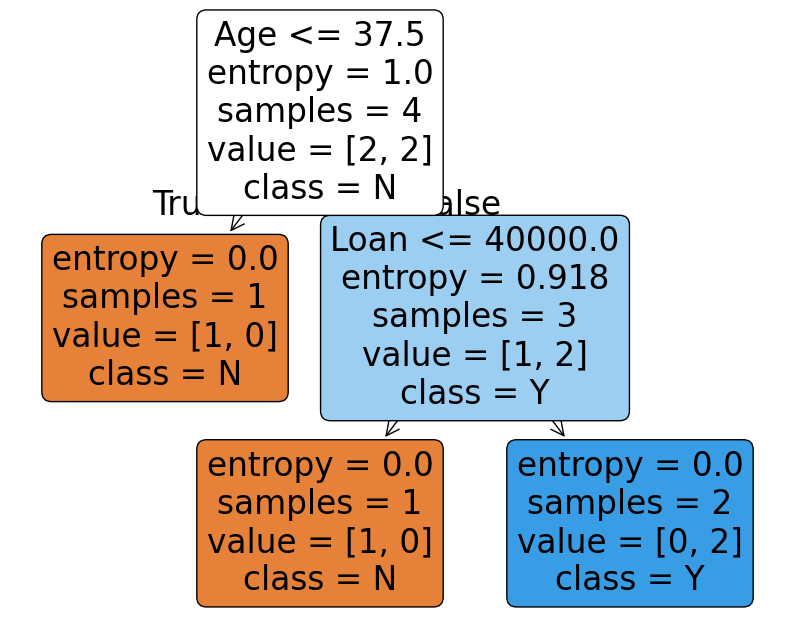

Part (c):Decision Trees are more resistant to irrelevant features than kNN.
kNN uses all features in distance calculations, so noise or irrelevant features can distort the neighbor selection.
Decision Trees perform feature selection during training, automatically ignoring features that do not help with classification.
Thus, Decision Trees tend to be more robust when many irrelevant features are present.


In [12]:
# Q1 Answer
import math
import numpy as np
import pandas as pd

data = {
    'Customer':['A','B','C','D'],
    'Age':[35,52,40,60],
    'Loan':[120000,18000,62000,100000],
    'Default':['N','N','Y','Y']
}
df = pd.DataFrame(data)
print("Training Dataset:")
print(df)

predict_sample = {'Customer':'E','Age':48,'Loan':148000}

# Perform KNN (K=3) algorithm over this dataset
def manhattan_distance(age1, loan1, age2, loan2):
    """
     distance=|age1-age2|+|log(loan1)-log(loan2)|
    """
    return abs(age1-age2) +abs(math.log(loan1)-math.log(loan2))

# KNN prediction
def knn_predict(df, test_age, test_loan, k=3):
    # Calculate distance
    distances = []
    for i, row in df.iterrows():
        age_i = row['Age']
        loan_i = row['Loan']
        label = row['Default']

        dist = manhattan_distance(test_age, test_loan, age_i, loan_i)
        distances.append((label, dist))

    distances.sort(key=lambda x: x[1])

    neighbors = distances[:k]

    count_N = sum(1 for lbl, d in neighbors if lbl == 'N')
    count_Y = sum(1 for lbl, d in neighbors if lbl == 'Y')

    if count_N >= count_Y:
        prediction = 'N'
    else:
        prediction = 'Y'

    return prediction, neighbors

#Run KNN
knn_label, knn_neighbors = knn_predict(df, predict_sample['Age'], predict_sample['Loan'], k=3)
print("\n---Part (a): KNN (K=3) Prediction ---")
print("Predict Sample = E (Age=48, Loan=148000)")
print("Neighbors (label, distance) =", knn_neighbors)
print("=> KNN Predicted Default =", knn_label)


# Part (b) Decision Tree (entropy) + predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

X = df[['Age', 'Loan']]
y = df['Default']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

clf = DecisionTreeClassifier(criterion='entropy', random_state=20250405)
clf.fit(X, y_encoded)

# Predict & Visualization
test_X = np.array([[predict_sample['Age'], predict_sample['Loan']]])
dt_pred_num = clf.predict(test_X)[0]
dt_pred_label = label_encoder.inverse_transform([dt_pred_num])[0]

print("\n--- Part (b):Decision Tree Prediction ---")
print("Predict Sample = E (Age=48, Loan=148000)")
print("=> Decision Tree Predicted Default =", dt_pred_label)


from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
tree.plot_tree(
    clf,
    feature_names=['Age','Loan'],
    class_names=label_encoder.classes_,
    filled=True,
    rounded=True
)
plt.show()

print("""Part (c):Decision Trees are more resistant to irrelevant features than kNN.
kNN uses all features in distance calculations, so noise or irrelevant features can distort the neighbor selection.
Decision Trees perform feature selection during training, automatically ignoring features that do not help with classification.
Thus, Decision Trees tend to be more robust when many irrelevant features are present.""")


In [14]:
#Q2 Answer

# Import libraries
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Prepare data
X = np.array([
    [3, 4],
    [1, 4],
    [2, 3],
    [6, -1],
    [7, -1],
    [5, -3]
])
y = np.array([-1, -1, -1, 1, 1, 1])

# Part (a): Create linear decision boundary using SVM
clf = SVC(kernel='linear', random_state=20250405)
clf.fit(X, y)

# Part (b) Identify slope and intercept values
print("Coefficients (w1, w2) =", clf.coef_[0])
print("Intercept (b) =", clf.intercept_[0])

w = clf.coef_[0]
b = clf.intercept_[0]

# Compute slope and intercept
slope = -w[0]/w[1]
intercept_line= -b/w[1]

print(f"Slope = {slope}")
print(f"Intercept = {intercept_line}")

# Part (c): Identify support vectors
print("Support vectors:")
print(clf.support_vectors_)



Coefficients (w1, w2) = [ 0.25 -0.25]
Intercept (b) = -0.75
Slope = 1.0
Intercept = -3.0
Support vectors:
[[ 2.  3.]
 [ 6. -1.]]


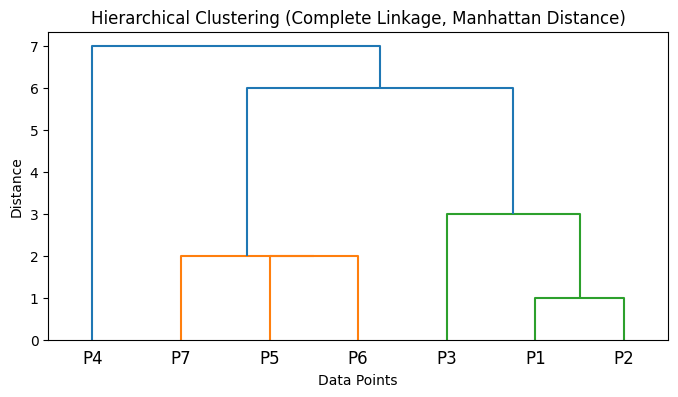

Part (c):Yes, in general, hierarchical clustering can help detect outliers. 
Outliers often remain isolated or join clusters only at higher distances. 
By examining the dendrogram, points that join the main clusters last (at higher linkage distances) can be identified as outliers/anomalous points.
Part (d):Yes, dendrograms can be pruned by setting a threshold distance and cutting horizontally. 
This divides the dendrogram into separate clusters at a chosen level, effectively cutting off the branches that are not important.


In [18]:
#Q3 Answer

# Import libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Prepare the dataset
data = np.array([
    [1, 1],
    [2, 1],
    [4, 1],
    [2, 6],
    [3, 3],
    [4, 4],
    [5, 3]
])

# Part (a)
Z = linkage(data, method='complete', metric='cityblock')  # 'cityblock' = Manhattan distance

# Part (b)
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=[f"P{i+1}" for i in range(len(data))])  # Optional: label each point as P1, P2, ...
plt.title("Hierarchical Clustering (Complete Linkage, Manhattan Distance)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

print("""Part (c):Yes, in general, hierarchical clustering can help detect outliers.
Outliers often remain isolated or join clusters only at higher distances.
By examining the dendrogram, points that join the main clusters last (at higher linkage distances) can be identified as outliers/anomalous points.""")

print("""Part (d):Yes, dendrograms can be pruned by setting a threshold distance and cutting horizontally.
This divides the dendrogram into separate clusters at a chosen level, effectively cutting off the branches that are not important.""")

